### **Loading the data and libraries and Forecast**

21:47:23 - cmdstanpy - INFO - Chain [1] start processing
21:47:24 - cmdstanpy - INFO - Chain [1] done processing
21:47:25 - cmdstanpy - INFO - Chain [1] start processing
21:47:25 - cmdstanpy - INFO - Chain [1] done processing
21:47:26 - cmdstanpy - INFO - Chain [1] start processing
21:47:27 - cmdstanpy - INFO - Chain [1] done processing
21:47:28 - cmdstanpy - INFO - Chain [1] start processing
21:47:28 - cmdstanpy - INFO - Chain [1] done processing
21:47:29 - cmdstanpy - INFO - Chain [1] start processing
21:47:30 - cmdstanpy - INFO - Chain [1] done processing
21:47:31 - cmdstanpy - INFO - Chain [1] start processing
21:47:31 - cmdstanpy - INFO - Chain [1] done processing


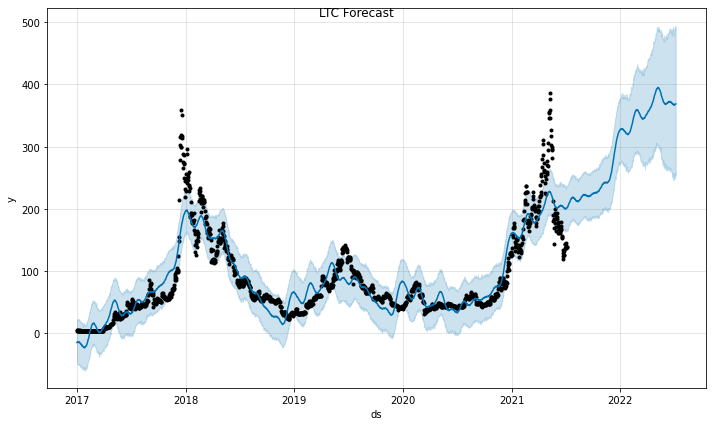

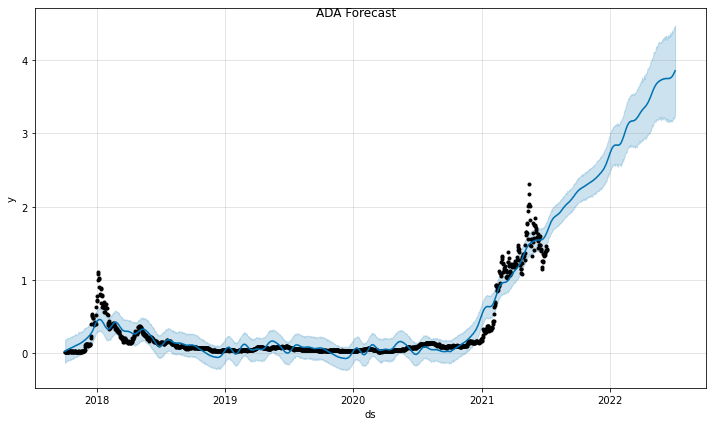

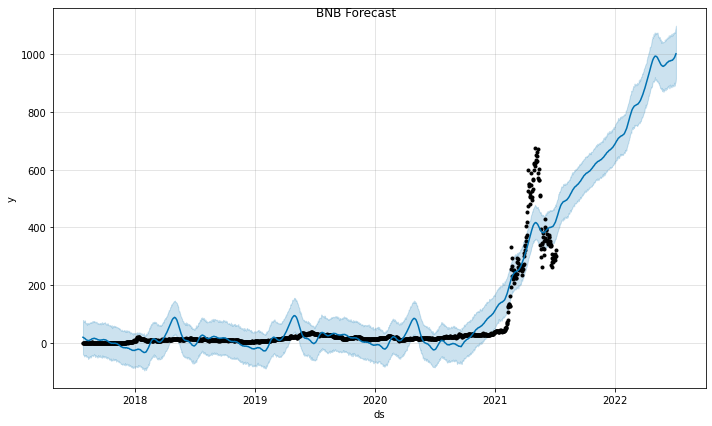

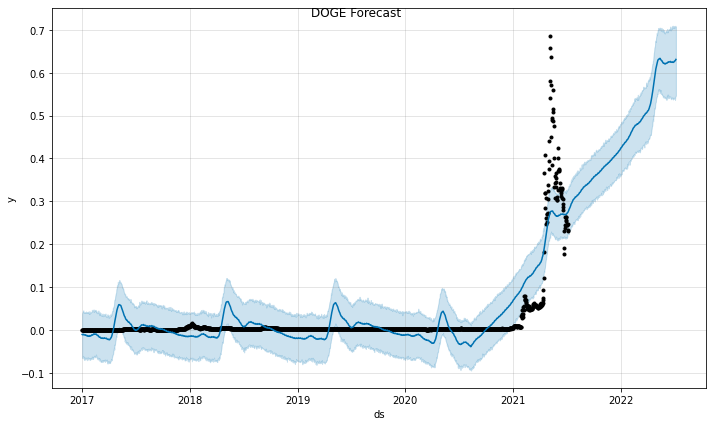

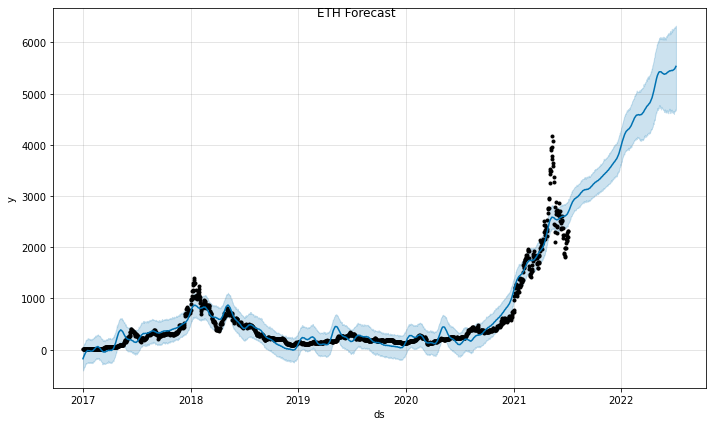

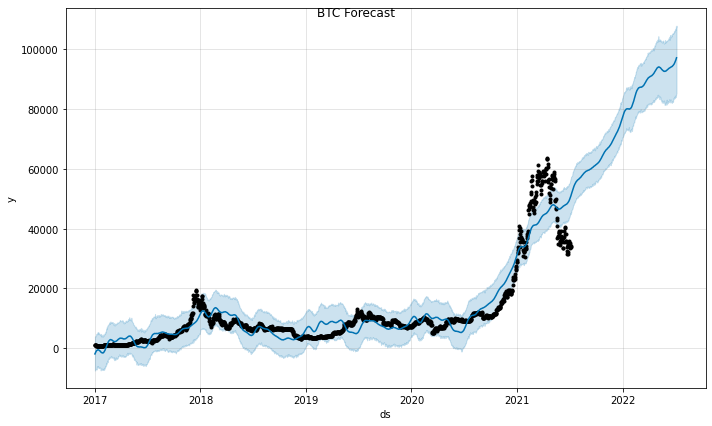

In [1]:
#import libraries
import pandas as pd
from prophet import Prophet

# Load the dataset
df = pd.read_csv('sixcrypto.csv')

# Split the dataset based on the cryptocurrency symbol
crypto_symbols = df['Symbol'].unique()

for symbol in crypto_symbols:
    crypto_data = df[df['Symbol'] == symbol]

    # Prepare the data for Prophet
    crypto_data = crypto_data[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
    
    # Fit the Prophet model
    model = Prophet()
    model.fit(crypto_data)
    
    # Make a future dataframe for the next 365 days
    future = model.make_future_dataframe(periods=365)
    
    # Make predictions
    forecast = model.predict(future)
    
    # Plot the forecast
    fig = model.plot(forecast)
    fig.suptitle(f'{symbol} Forecast')


### **Prophte Model Evaluation**

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd

# Load data
df = pd.read_csv('sixcrypto.csv')

# Group data by symbol
symbol_groups = df.groupby('Symbol')

# Create an empty dictionary to store evaluation metrics for each symbol
metrics_dict = {}

# Loop through each symbol and fit a Prophet model
for symbol, symbol_df in symbol_groups:
    # Create Prophet model
    model = Prophet()
    # Train model on symbol data
    model.fit(symbol_df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'}))
    # Generate future dates for predictions
    future = model.make_future_dataframe(periods=365)
    # Make predictions
    forecast = model.predict(future)
    # Compute evaluation metrics
    mae = mean_absolute_error(symbol_df['Close'], forecast.loc[:len(symbol_df)-1, 'yhat'])
    mse = mean_squared_error(symbol_df['Close'], forecast.loc[:len(symbol_df)-1, 'yhat'])
    rmse = mse**0.5
    
    # Store evaluation metrics for the symbol in the metrics dictionary
    metrics_dict[symbol] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

# Convert the metrics dictionary to a pandas DataFrame and print it
metrics_df = pd.DataFrame(metrics_dict).T
print(metrics_df)

22:18:35 - cmdstanpy - INFO - Chain [1] start processing
22:18:35 - cmdstanpy - INFO - Chain [1] done processing
22:18:36 - cmdstanpy - INFO - Chain [1] start processing
22:18:36 - cmdstanpy - INFO - Chain [1] done processing
22:18:37 - cmdstanpy - INFO - Chain [1] start processing
22:18:38 - cmdstanpy - INFO - Chain [1] done processing
22:18:39 - cmdstanpy - INFO - Chain [1] start processing
22:18:39 - cmdstanpy - INFO - Chain [1] done processing
22:18:40 - cmdstanpy - INFO - Chain [1] start processing
22:18:41 - cmdstanpy - INFO - Chain [1] done processing
22:18:42 - cmdstanpy - INFO - Chain [1] start processing
22:18:42 - cmdstanpy - INFO - Chain [1] done processing


              MAE           MSE         RMSE
ADA      0.079696  1.411654e-02     0.118813
BNB     28.227092  2.051562e+03    45.294176
BTC   3132.685535  1.992558e+07  4463.808284
DOGE     0.025833  1.754967e-03     0.041892
ETH    112.520038  3.143952e+04   177.311926
LTC     19.152992  7.745510e+02    27.830756


### **Correlation of Predicted and Actual prices for Prophet Model**

In [6]:
import pandas as pd
from prophet import Prophet

# Load the data from the CSV file
df = pd.read_csv('sixcrypto.csv')

# Define the time series to be analyzed
time_series = df[['Date', 'Close']]

# Initialize an empty list to store the correlation coefficients
corr_coeffs = []

# Loop over each currency in the data
for currency in df['Name'].unique():
    # Extract the time series for the current currency
    currency_ts = time_series[df['Name'] == currency].rename(columns={'Date': 'ds', 'Close': 'y'})
    
    # Apply the Prophet model to the time series
    prophet_model = Prophet()
    prophet_fit = prophet_model.fit(currency_ts)
    prophet_pred = prophet_fit.predict(currency_ts)
    
    # Calculate the correlation coefficient between the predicted and actual values
    corr_coeff = currency_ts['y'].corr(prophet_pred['yhat'])
    
    # Check if the correlation coefficient is NaN and replace it with 0.0
    if pd.isna(corr_coeff):
        corr_coeff = 0.0
        
    corr_coeffs.append(corr_coeff)

# Print the results in tabular format
results = pd.DataFrame({'Name': df['Name'].unique(), 'Correlation Coefficient': corr_coeffs})
print(results)


22:29:25 - cmdstanpy - INFO - Chain [1] start processing
22:29:26 - cmdstanpy - INFO - Chain [1] done processing
22:29:27 - cmdstanpy - INFO - Chain [1] start processing
22:29:27 - cmdstanpy - INFO - Chain [1] done processing
22:29:28 - cmdstanpy - INFO - Chain [1] start processing
22:29:29 - cmdstanpy - INFO - Chain [1] done processing
22:29:30 - cmdstanpy - INFO - Chain [1] start processing
22:29:30 - cmdstanpy - INFO - Chain [1] done processing
22:29:31 - cmdstanpy - INFO - Chain [1] start processing
22:29:32 - cmdstanpy - INFO - Chain [1] done processing
22:29:33 - cmdstanpy - INFO - Chain [1] start processing
22:29:33 - cmdstanpy - INFO - Chain [1] done processing


           Name  Correlation Coefficient
0      Litecoin                 0.908998
1       Cardano                 0.000000
2  Binance Coin                 0.000000
3      Dogecoin                 0.000000
4      Ethereum                 0.000000
5       Bitcoin                 0.000000


In [5]:
import pandas as pd
from prophet import Prophet

# Load the data from the CSV file
df = pd.read_csv('sixcrypto.csv')

# Define the time series to be analyzed
time_series = df[['Date', 'Close']]

# Initialize an empty list to store the correlation coefficients
corr_coeffs = []

# Loop over each currency in the data
for currency in df['Name'].unique():
    # Extract the time series for the current currency
    currency_ts = time_series[df['Name'] == currency].rename(columns={'Date': 'ds', 'Close': 'y'})
    
    # Apply the Prophet model to the time series
    prophet_model = Prophet(changepoint_prior_scale=0.5, seasonality_prior_scale=20)
    prophet_fit = prophet_model.fit(currency_ts)
    prophet_pred = prophet_fit.predict(currency_ts)
    
    # Calculate the correlation coefficient between the predicted and actual values
    corr_coeff = currency_ts['y'].corr(prophet_pred['yhat'])
    corr_coeffs.append(corr_coeff)

# Print the results in tabular format
results = pd.DataFrame({'Name': df['Name'].unique(), 'Correlation Coefficient': corr_coeffs})
print(results)

22:27:24 - cmdstanpy - INFO - Chain [1] start processing
22:27:25 - cmdstanpy - INFO - Chain [1] done processing
22:27:27 - cmdstanpy - INFO - Chain [1] start processing
22:27:27 - cmdstanpy - INFO - Chain [1] done processing
22:27:28 - cmdstanpy - INFO - Chain [1] start processing
22:27:30 - cmdstanpy - INFO - Chain [1] done processing
22:27:31 - cmdstanpy - INFO - Chain [1] start processing
22:27:33 - cmdstanpy - INFO - Chain [1] done processing
22:27:34 - cmdstanpy - INFO - Chain [1] start processing
22:27:35 - cmdstanpy - INFO - Chain [1] done processing
22:27:36 - cmdstanpy - INFO - Chain [1] start processing
22:27:37 - cmdstanpy - INFO - Chain [1] done processing


           Name  Correlation Coefficient
0      Litecoin                  0.95676
1       Cardano                      NaN
2  Binance Coin                      NaN
3      Dogecoin                      NaN
4      Ethereum                      NaN
5       Bitcoin                      NaN
